# Setup

In [3]:
# modules that are going to be used
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt


# Data

In [7]:
# we are using the data from Kickstarter Platform

kickstarters_2017 = pd.read_csv("ks-projects-201801.csv")

# Scaling

In [8]:
# we are now scaling the usd_goal column
original_data  = pd.DataFrame(kickstarters_2017.usd_goal_real)

# scaling the goals from 0 to 1
scaled_data = minmax_scaling(original_data, columns = ['usd_goal_real'])

print("Orginal data ", original_data.head())
print('Min value:', float(original_data.min()), 'Max value:', float(original_data.max()))
print('_'*40)
print('Scaled Data:', scaled_data.head())
print('Min value:', float(scaled_data.min()),
      'Max value:', float(scaled_data.max()))

Orginal data     usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Min value: 0.01 Max value: 166361390.71
________________________________________
Scaled Data:    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Min value: 0.0 Max value: 1.0


In [10]:
# we are now scaling the goal column
original_data_goal  = pd.DataFrame(kickstarters_2017.goal)

# scaling the goal column from 0 to 1
scaled_data_goal = minmax_scaling(original_data_goal, columns = ['goal'])

print("Orginal data ", original_data_goal.head())
print('Min value:', float(original_data_goal.min()), 'Max value:', float(original_data_goal.max()))
print('_'*40)
print('Scaled Data:', scaled_data_goal.head())
print('Min value:', float(scaled_data_goal.min()),
      'Max value:', float(scaled_data_goal.max()))

Orginal data        goal
0   1000.0
1  30000.0
2  45000.0
3   5000.0
4  19500.0
Min value: 0.01 Max value: 100000000.0
________________________________________
Scaled Data:        goal
0  0.000010
1  0.000300
2  0.000450
3  0.000050
4  0.000195
Min value: 0.0 Max value: 1.0


# Normalization

In [11]:
# as we know Box-Cox only takes positive values, we are going to take positive values from the index
# first we need index
index_of_postve_pledges =  kickstarters_2017.usd_pledged_real > 0

# now getting positive pledges with the help of index
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_postve_pledges]

#normalizing with Box-Cox
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0],
                               name='usd_pledged_real', index= positive_pledges.index)

# printing the results
print("Orginal data ", positive_pledges.head())
print('Min value:', float(positive_pledges.min()), 'Max value:', float(positive_pledges.max()))
print('_'*40)
print('Scaled Data:', normalized_pledges.head())
print('Min value:', float(normalized_pledges.min()),
      'Max value:', float(normalized_pledges.max()))

Orginal data  1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Min value: 0.45 Max value: 20338986.27
________________________________________
Scaled Data: 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: usd_pledged_real, dtype: float64
Min value: -0.7779954122762203 Max value: 30.69054020451361


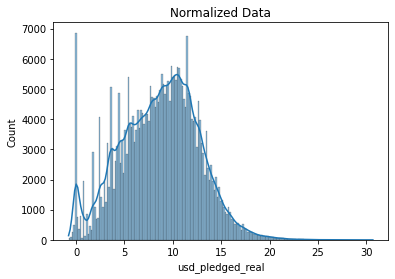

In [12]:
# now we are plotting the normalized data
ax = sns.histplot(normalized_pledges, kde = True)
ax.set_title("Normalized Data")
plt.show()

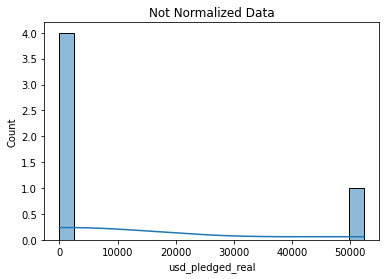

In [16]:
ax = sns.histplot(positive_pledges.head(), kde = True)
ax.set_title("Not Normalized Data")
plt.show()